In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dalmatian

from mhsflex.field2d import Field2dData, check_fluxbalance, alpha_HS04
from mhsflex.field3d import Field3dData, calculate_magfield, j3d, lf3d
from mhsflex.vis import plot, show_poles, show_footpoints
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt
from scipy.io import readsav


rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

In [10]:
path = "/Users/lilli/Desktop/mflex/data/Analytic_boundary_data.sav"

data = readsav(path, python_dict=True, verbose=True)

--------------------------------------------------
Date: Tue Sep  6 15:16:46 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 33 records of which:
 - 1 are of type NOTICE
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 29 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b2dx1 [<class 'numpy.ndarray'>]
 - b2dy1 [<class 'numpy.ndarray'>]
 - b2dz1 [<class 'numpy.ndarray'>]
 - d2d1 [<class 'numpy.ndarray'>]
 - b2dx2 [<class 'numpy.ndarray'>]
 - b2dy2 [<class 'numpy.ndarray'>]
 - b2dz2 [<class 'numpy.ndarray'>]
 - d2d2 [<class 'numpy.ndarray'>]
 - b2dx3 [<class 'numpy.ndarray'>]
 - b2dy3 [<class 'numpy.ndarray'>]
 - b2dz3 [<class 'numpy.ndarray'>]
 - d2d3 [<class 'numpy.ndarray'>]
 - b2dx4 [<class 'numpy.ndarray'>]
 - b2dy4 [<class 'numpy.ndarray'>]
 - b2dz4 [<class '

In [11]:
data_bz = data["b2dz5"]
data_bx = data["b2dx5"]
data_by = data["b2dy5"]

nresol_x = data_bz.shape[1]
nresol_y = data_bz.shape[0]

pixelsize_z_Mm = 40.0 * 10**-3  # Convert pixelsize from km into Mm
pixelsize_x_Mm = 40.0 * 10**-3
pixelsize_y_Mm = 40.0 * 10**-3

xmin = np.float64(0.0)  # Minimum value of x in data length scale, not in Mm
ymin = np.float64(0.0)  # Minimum value of y in data length scale, not in Mm
zmin = np.float64(0.0)  # Minimum value of z in data length scale, not in Mm

xmax_Mm = nresol_x * pixelsize_x_Mm
ymax_Mm = nresol_y * pixelsize_y_Mm
zmax_Mm = 4000.0 * 10**-3

nresol_z = int(np.floor(zmax_Mm / pixelsize_z_Mm))

z0 = 2000.0 * 10**-3

nf_max = min(nresol_x, nresol_y)

print("xmax_Mm, ymax_Mm, zmax_Mm", xmax_Mm, ymax_Mm, zmax_Mm)
print("nresol_x, nresol_y, nresol_z", nresol_x, nresol_y, nresol_z)
print("pixelsize_x", pixelsize_x_Mm)
print("pixelsize_y", pixelsize_y_Mm)
print("pixelsize_z", pixelsize_z_Mm)

x_arr = np.arange(nresol_x) * (xmax_Mm) / (nresol_x - 1) - xmax_Mm/2
y_arr = np.arange(nresol_y) * (ymax_Mm) / (nresol_y - 1) - xmax_Mm/2 

x_arr = np.arange(nresol_x) * (xmax_Mm) / (nresol_x - 1) 
y_arr = np.arange(nresol_y) * (ymax_Mm) / (nresol_y - 1)
z_arr = np.arange(nresol_z) * (zmax_Mm - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

xmax_Mm, ymax_Mm, zmax_Mm 3.2 3.2 4.0
nresol_x, nresol_y, nresol_z 80 80 100
pixelsize_x 0.04
pixelsize_y 0.04
pixelsize_z 0.04


In [12]:
folder = "/Users/lilli/Desktop/Thesis/ISSI_SA/Part1"

In [13]:
alpha_HS04(data_bx, data_by, data_bz) / 0.04 

-0.946507416665554

In [14]:
print(data_bz.min())
print(data_bz.max())

-1792.2522
446.3689


In [15]:
alpha = -0.94
length_scale = float(2.0)  # Normalising length scale for Seehafer

length_scale_x = 2.0 * nresol_x * pixelsize_x_Mm
length_scale_y = 2.0 * nresol_y * pixelsize_y_Mm

length_scale_x_norm = length_scale_x / length_scale 
length_scale_y_norm = length_scale_y / length_scale 

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]
one_arr = 0.0 * np.arange(nf_max) + 1.0

ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]

# kx^2 + ky^2

k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2
k2_arr[1, 0] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2
k2_arr[0, 1] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2

# Need k^2 > alpha^2/(1-2a) and k^2 > alpha^2

limit = 1 / 2 * (1 - alpha**2 / k2_arr)

print(limit.min())

from scipy.special import jv

# for z in z_arr:
#     print(jv(p, q * np.exp(- z * 0.02 / 2.0)))

# for ix in range(nf_max):
#     for iy in range(nf_max):
#         if jv(p, q)[iy, ix] != 0: print(iy, ix, " : p ", p[iy, ix], " : q ", q[iy, ix])

0.2708098614620937


In [16]:
data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nf_max,
    pixelsize_x_Mm,
    pixelsize_y_Mm,
    pixelsize_z_Mm,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [17]:
b = 1.0
aL = 0.0
aMHS = 0.27
#data3dP = calculate_magfield(data2d, aL, b, 0.0, 2.0, 0.2)
data3dL = calculate_magfield(data2d, aL, b, alpha, 2.0, 0.2)
data3dMHS = calculate_magfield(data2d, aMHS, b, alpha, 2.0, 0.2)

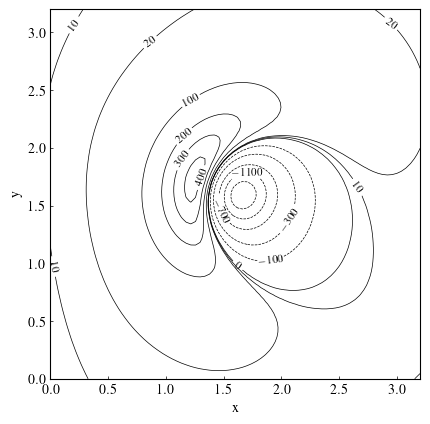

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data2d.bz,
    levels=np.array((-1500, -1100, -700, -300, -100, 0, 10, 20, 100, 200, 300, 400)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname =  folder + "/contour.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

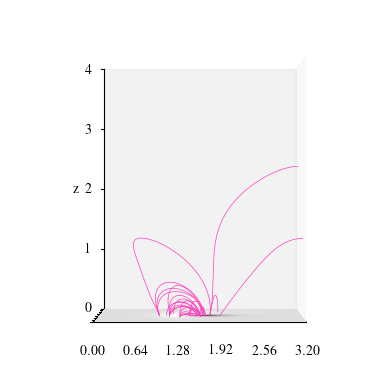

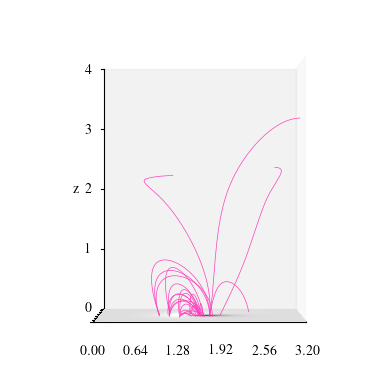

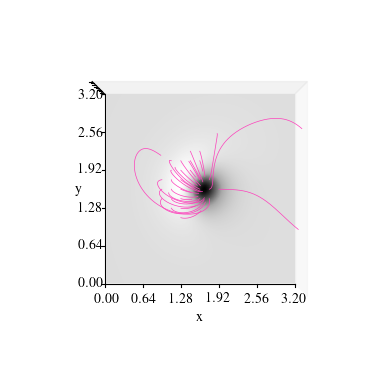

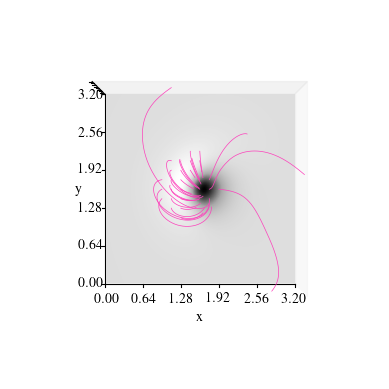

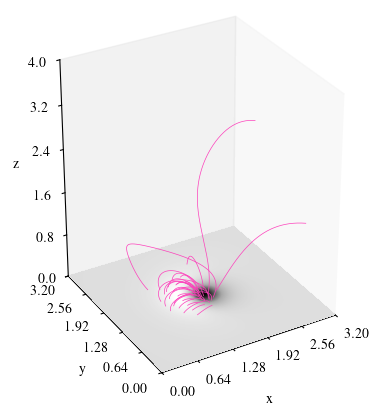

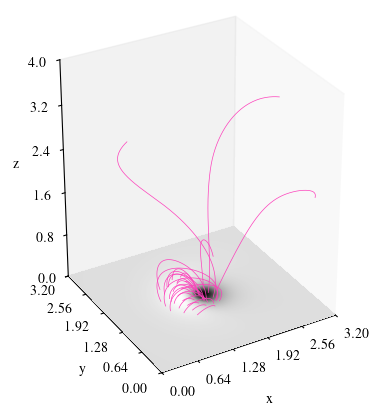

In [20]:
plot(data3dL, "side", save=True, path=folder)
plot(data3dMHS, "side", save=True, path=folder)
plot(data3dL, "los", save=True, path=folder)
plot(data3dMHS, "los", save=True, path=folder)
plot(data3dL, "angular", save=True, path=folder)
plot(data3dMHS, "angular", save=True, path=folder)

In [13]:
compare_field3d(data3dL, data3dMHS)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9507246363220742 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9681726099830752 (Reference value:  1.0 )
Normalised vector error metric:  0.5536916560797766 (Reference value:  0.0 )
Mean vector error metric:  1.1659971397200182 (Reference value:  0.0 )
Magnetic energy metric:  1.1034554489661446 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.49193548387096775
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICI

/Users/lilli/Desktop/mflex/mhsflex/metrics.py:322: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_ref.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:326: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_ref.flatten(), den_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:330: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_rec.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:334: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_rec.flatten(), den_surface_ref.flatten()),


In [21]:
ix_max = np.unravel_index(data3dMHS.bz.argmax(), data3dMHS.bz.shape)[1]
iy_max = np.unravel_index(data3dMHS.bz.argmax(), data3dMHS.bz.shape)[0]

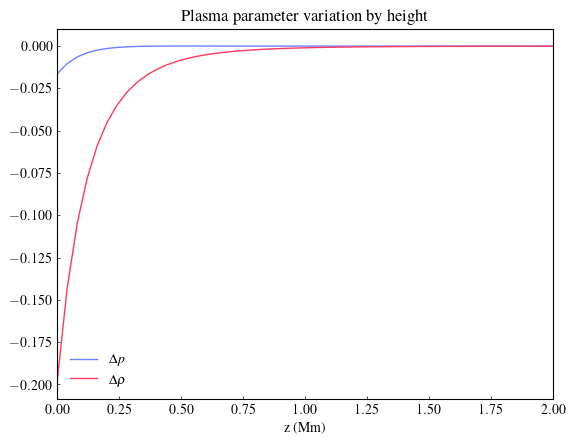

In [15]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3dMHS.z,
    data3dMHS.dpressure[iy_max, ix_max, :],
    linewidth=1.0,
    color=c2,
    label=r"$\Delta p$",
)

ax1.plot(
    data3dMHS.z,
    data3dMHS.ddensity[iy_max, ix_max, :],
    linewidth=1.0,
    linestyle="solid",
    color=c4,
    label=r"$\Delta \rho$",
)

ax1.set_xlabel("z (Mm)")
plt.xlim([0, z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma parameter variation by height"
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/dpp.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [22]:
iz_photo = 0
z_photo = 0.0

iz_z0half = int(nresol_z / 4.0)
z_z0half = z0 / 2.0

iz_z0 = int(nresol_z / 2.0)
z_z0 = z0

iz_2z0 = int(nresol_z / 1.0) -1
z_2z0 = 2 * z0

In [25]:
ErrormapP = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-FF8C2E
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c1),
    ),
)

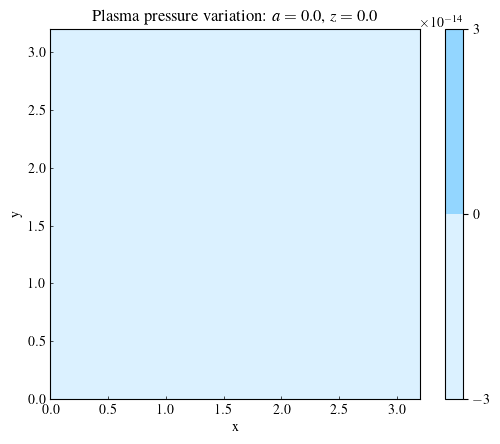

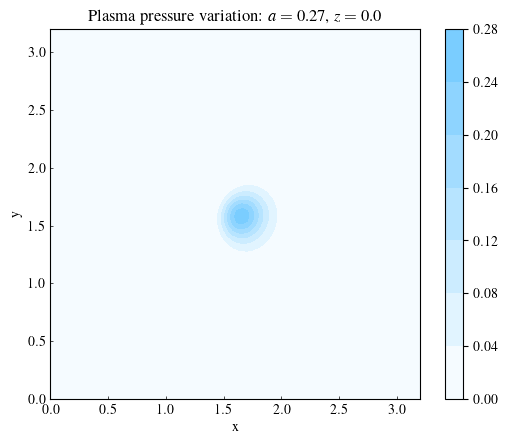

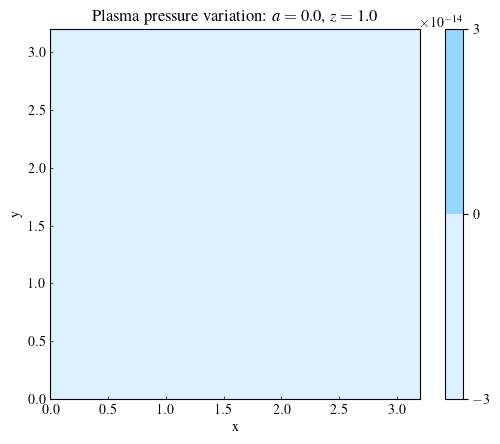

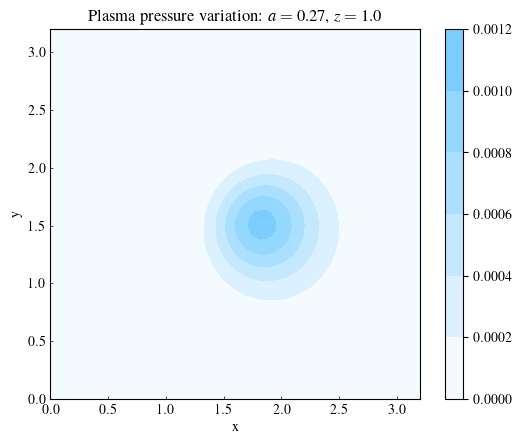

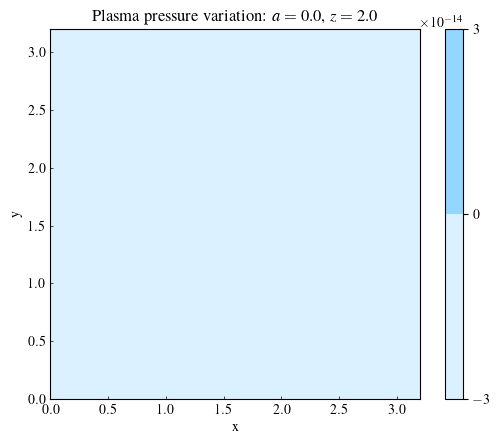

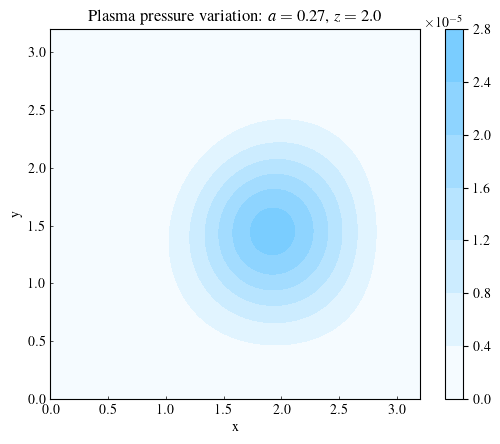

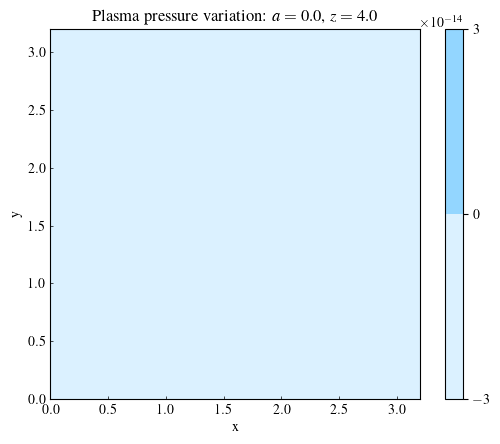

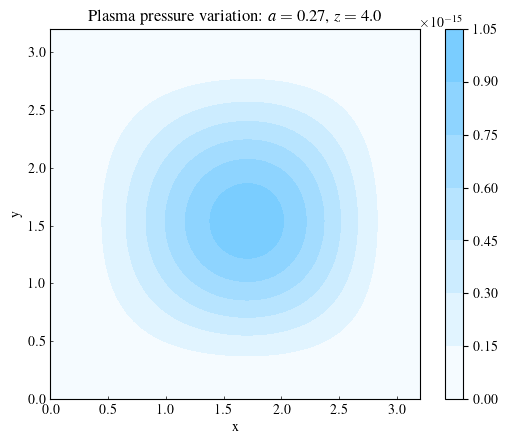

In [26]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3dL.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma pressure variation: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/dpsurf_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3dMHS.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma pressure variation: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/dpsurf_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [27]:
ErrormapD = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-6ED1F6
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c5),
    ),
)

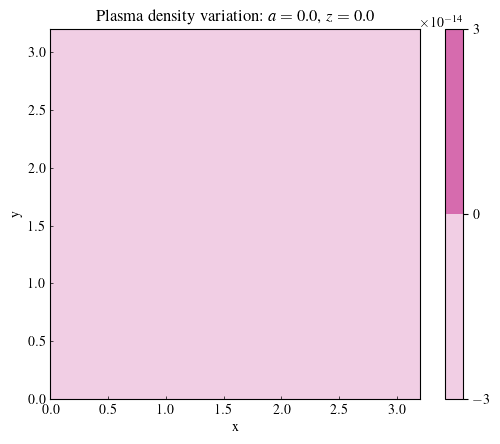

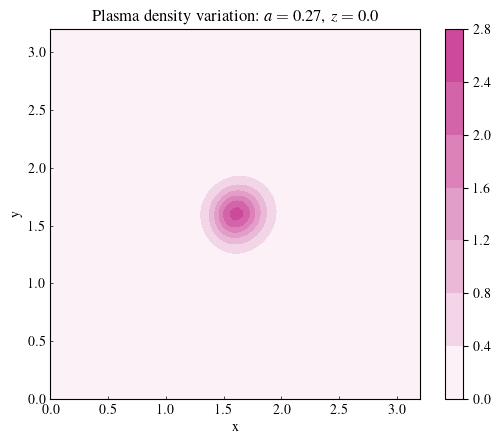

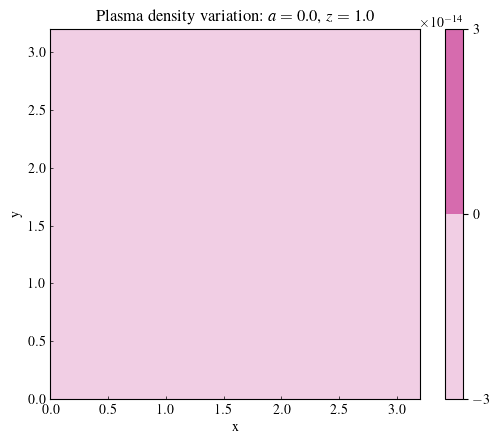

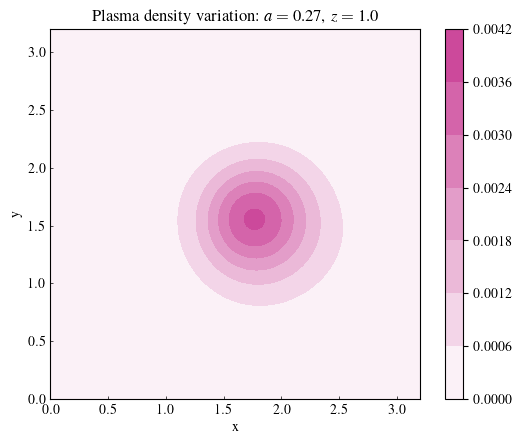

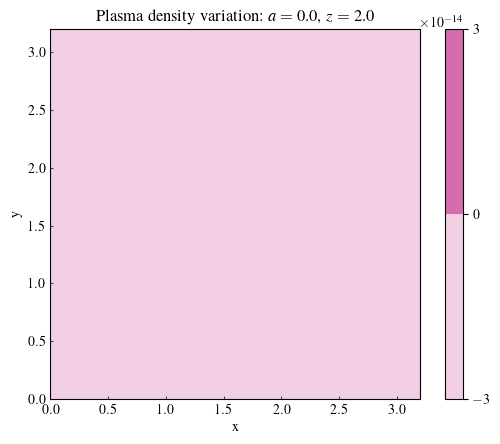

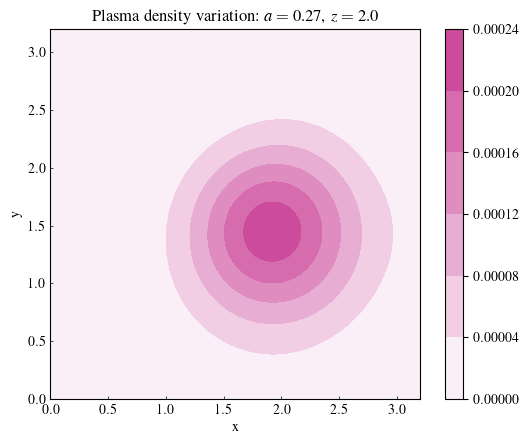

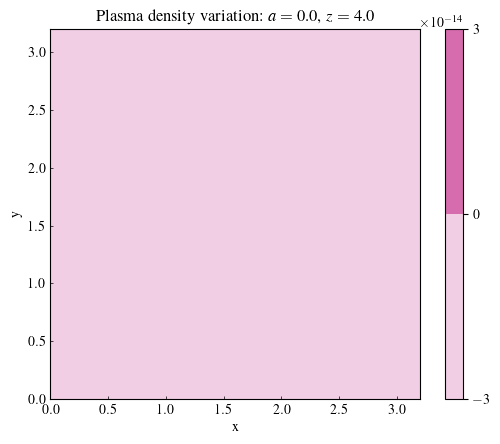

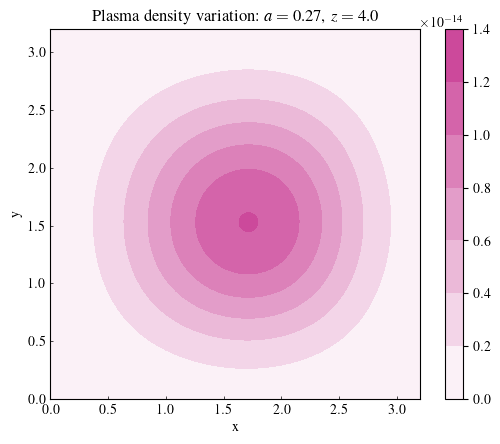

In [28]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3dL.ddensity[:, :, iiz]),
        6,
        cmap=ErrormapD,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma density variation: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/ddsurf_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        abs(data3dMHS.ddensity[:, :, iiz]),
        6,
        cmap=ErrormapD,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Plasma density variation: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/ddsurf_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [23]:
ErrormapJ = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-F1535C
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c8),
    ),
)

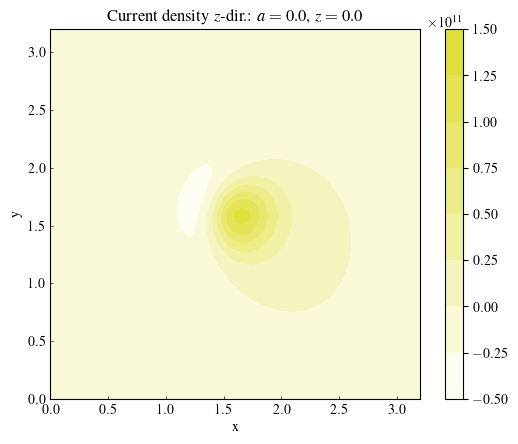

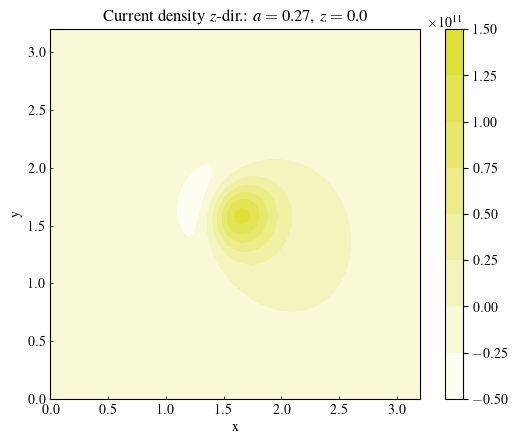

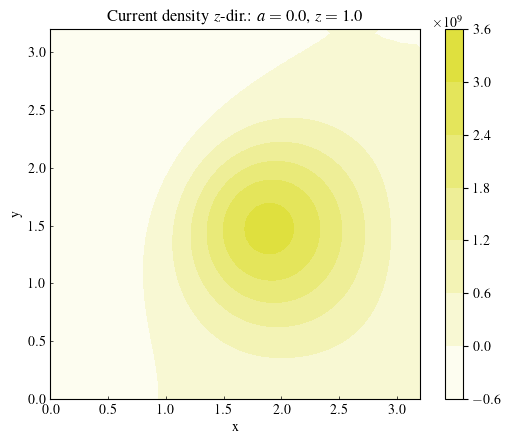

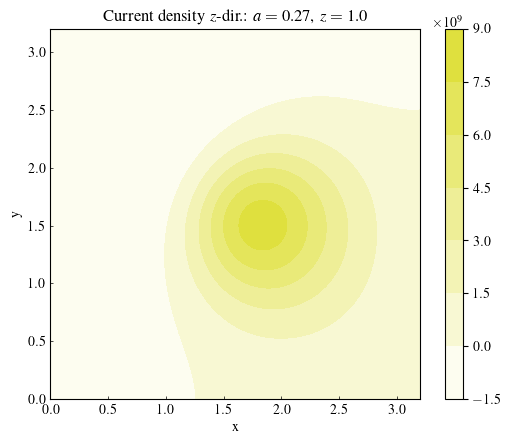

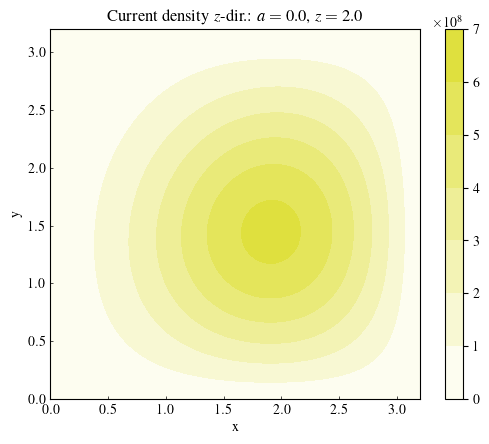

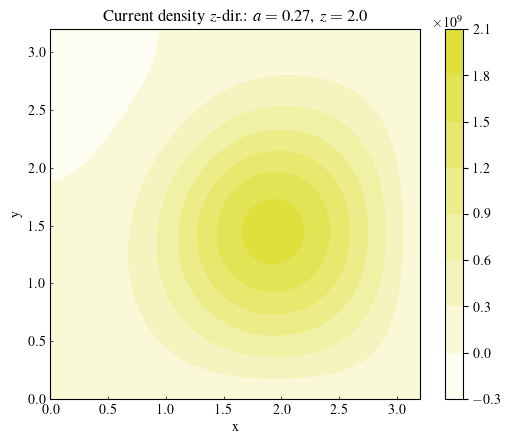

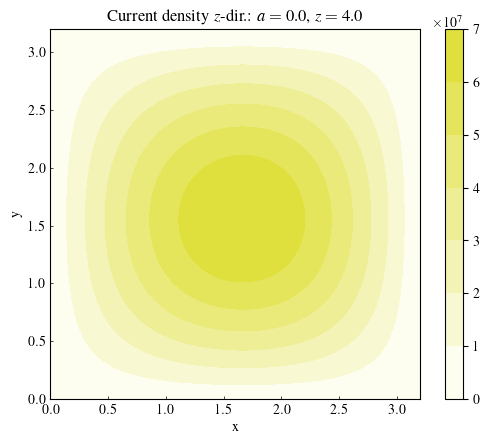

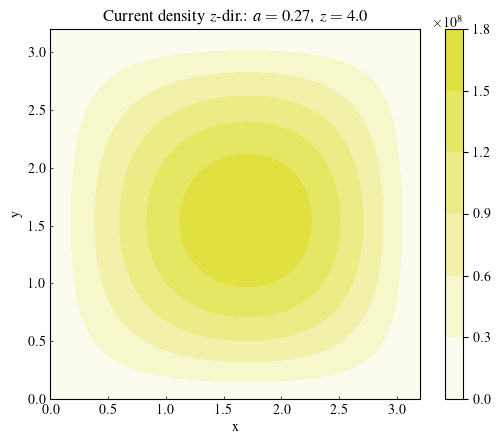

In [26]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dL.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $z$-dir.: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jz_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dMHS.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $z$-dir.: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jz_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

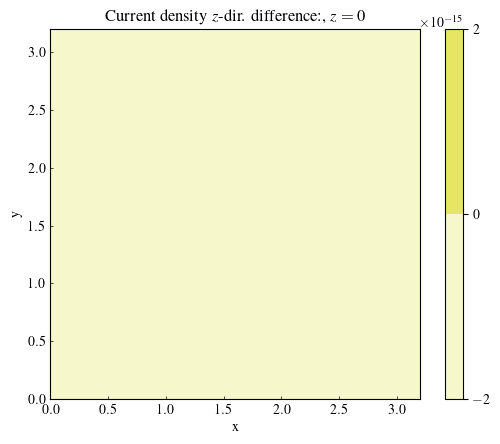

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid,
    y_grid,
    data3dL.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2]- data3dL.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2],
    100,
    cmap=ErrormapJ,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
fig.colorbar(C)
plt.title(
    r"Current density $z$-dir. difference:"
    + r", $ z = 0$ "
)
plt.show()

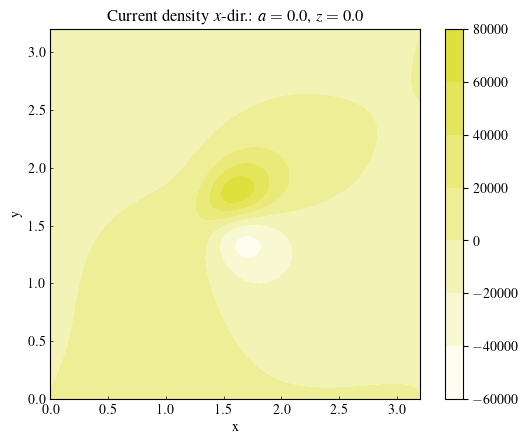

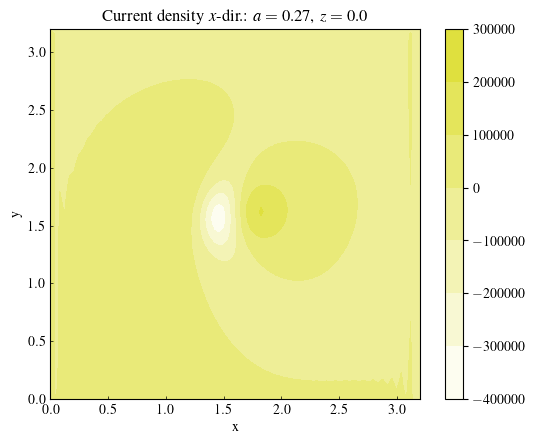

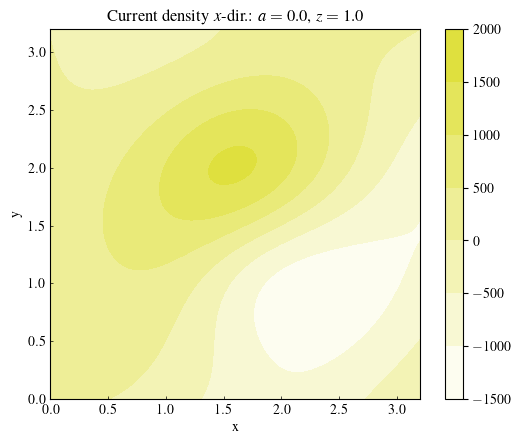

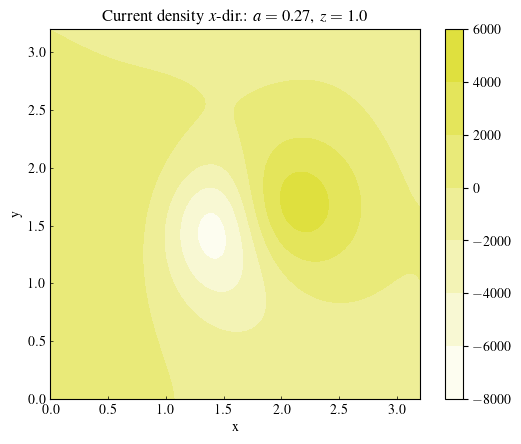

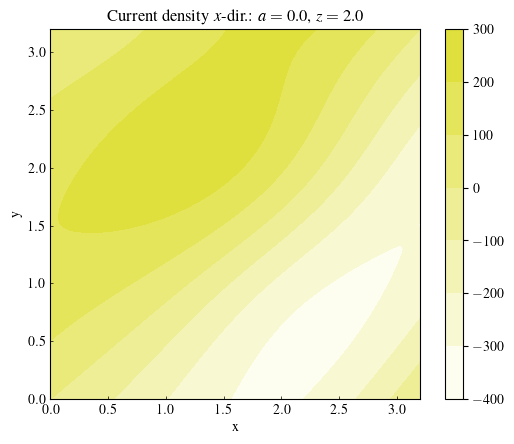

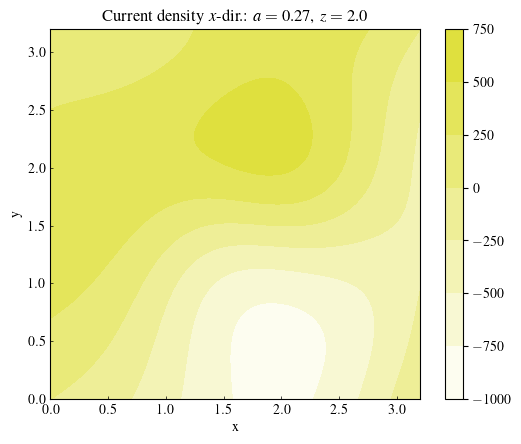

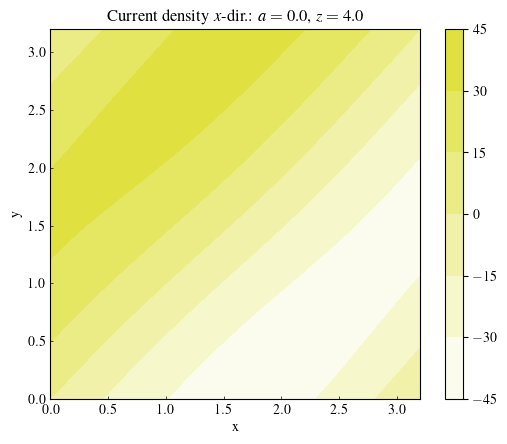

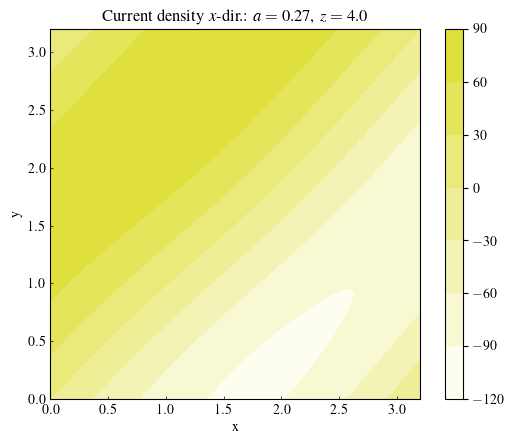

In [31]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dL.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $x$-dir.: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jx_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dMHS.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $x$-dir.: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jx_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

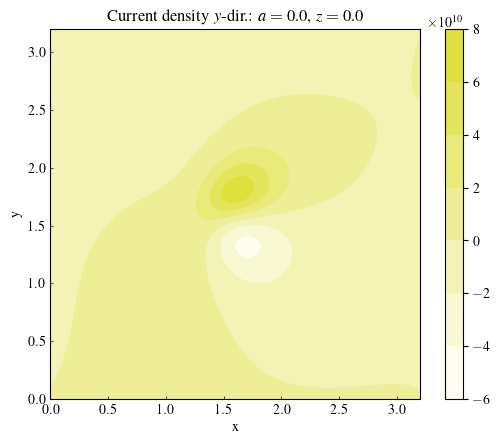

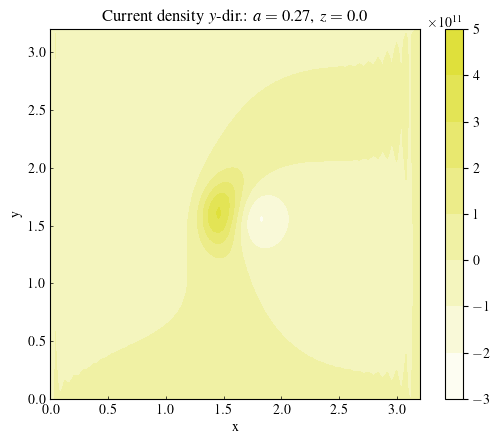

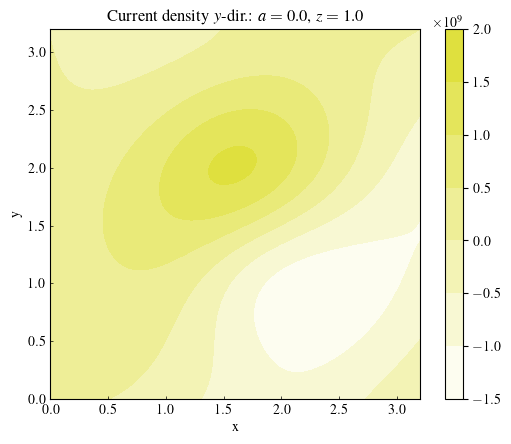

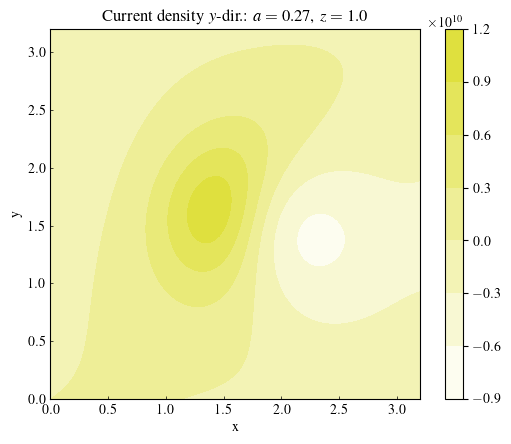

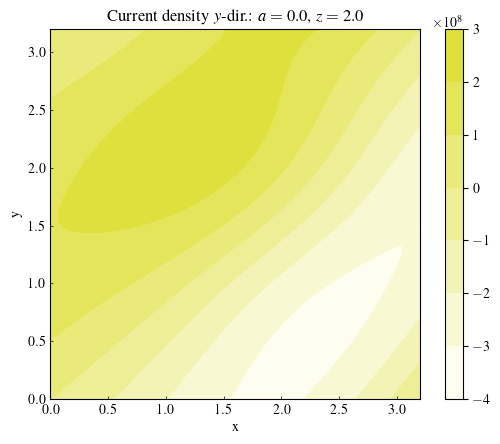

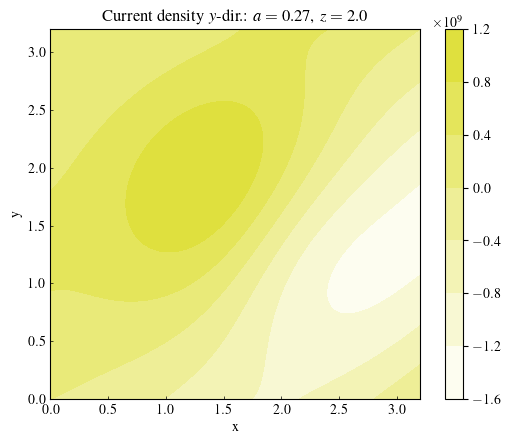

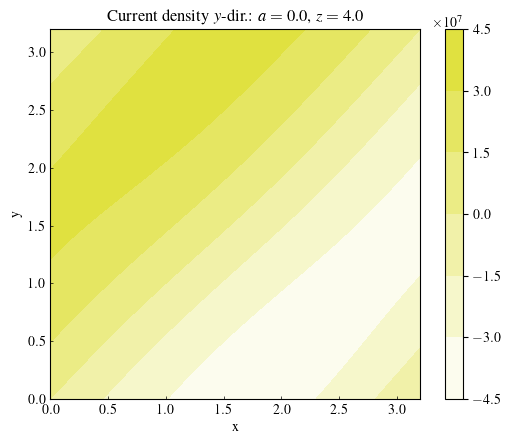

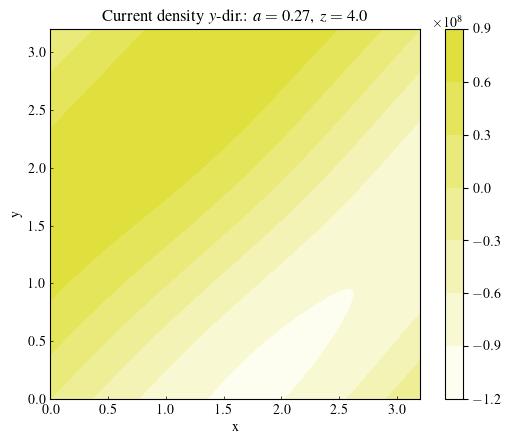

In [25]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dL.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $y$-dir.: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jy_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dMHS.j3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapJ,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Current density $y$-dir.: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/jy_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [27]:
ErrormapL = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-F1535C
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c7),
    ),
)

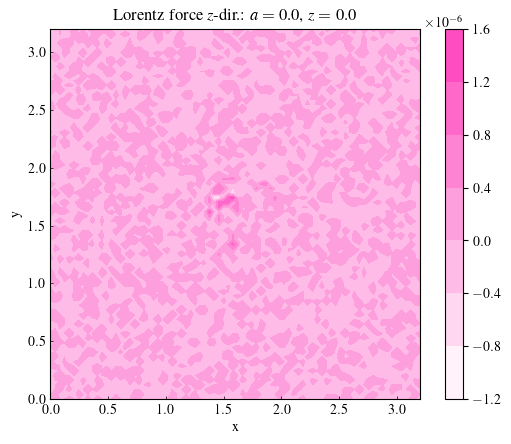

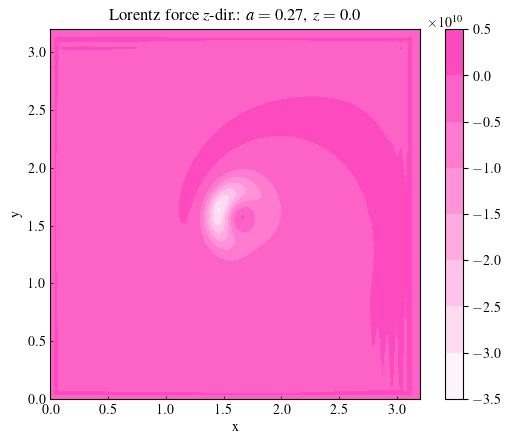

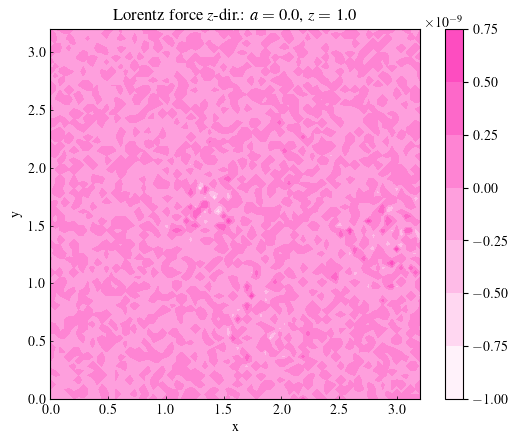

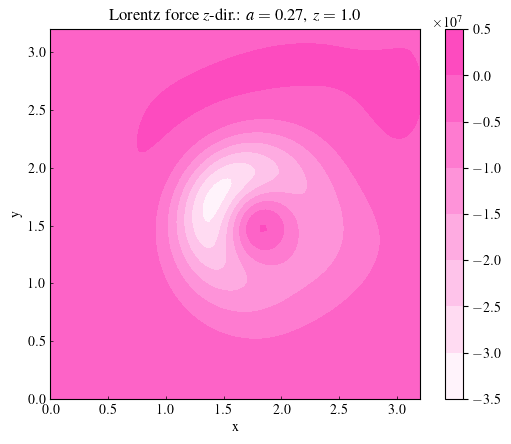

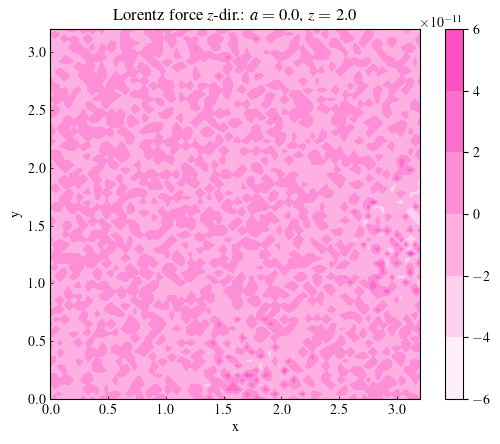

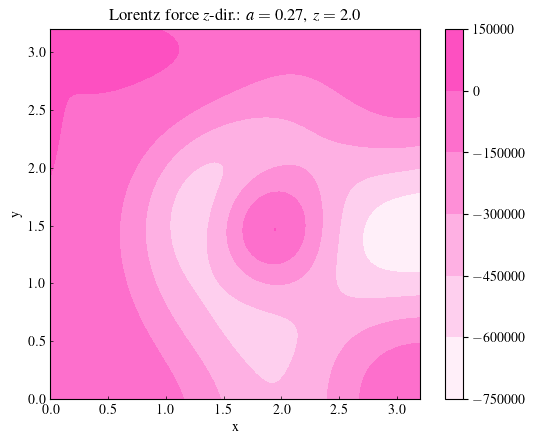

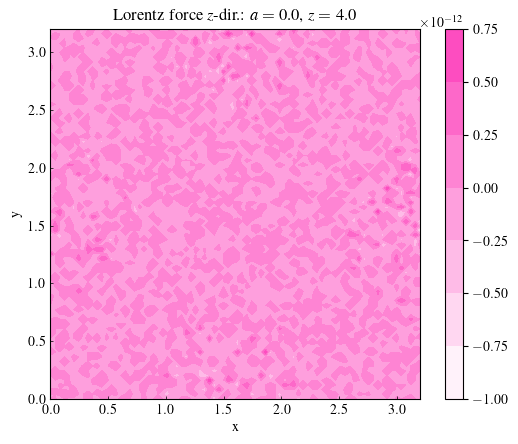

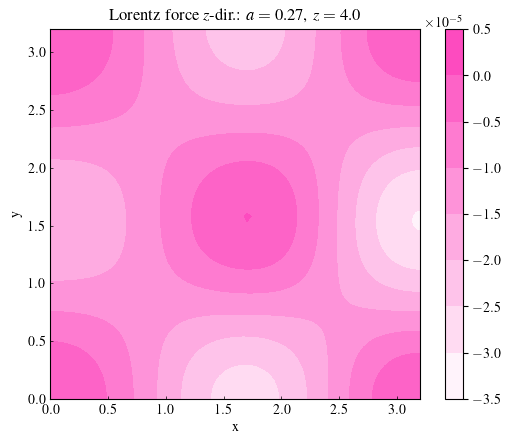

In [28]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dL.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $z$-dir.: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfz_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dMHS.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 2],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $z$-dir.: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfz_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

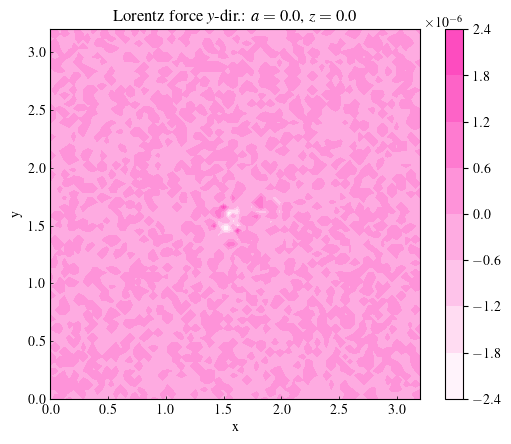

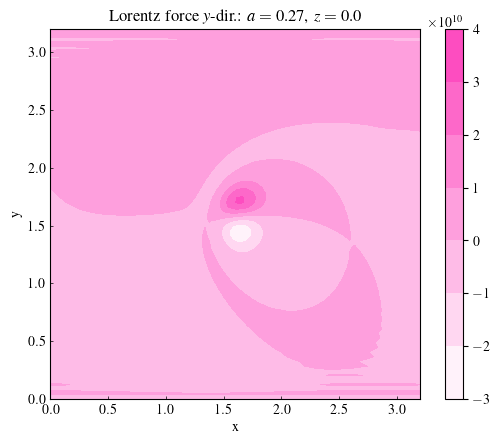

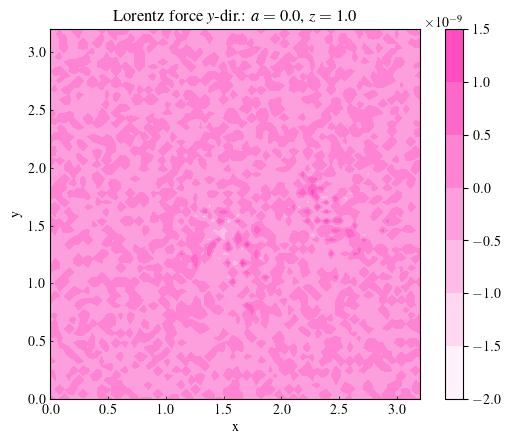

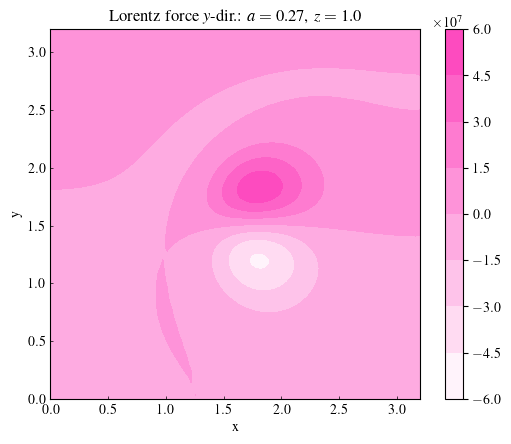

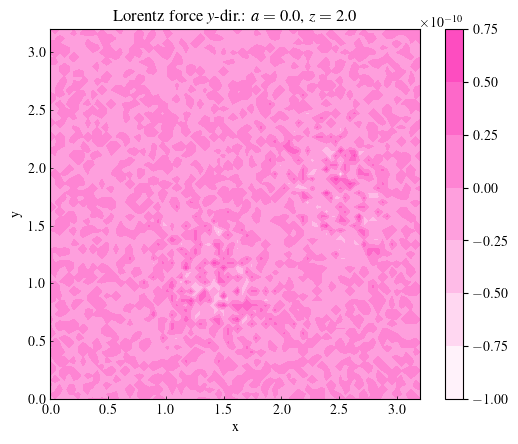

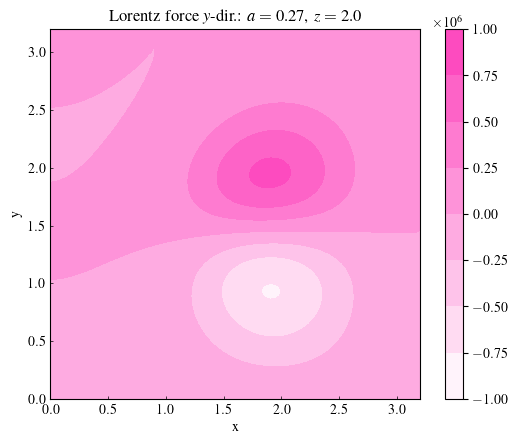

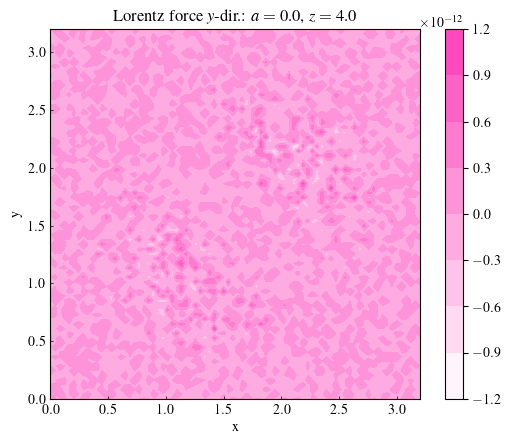

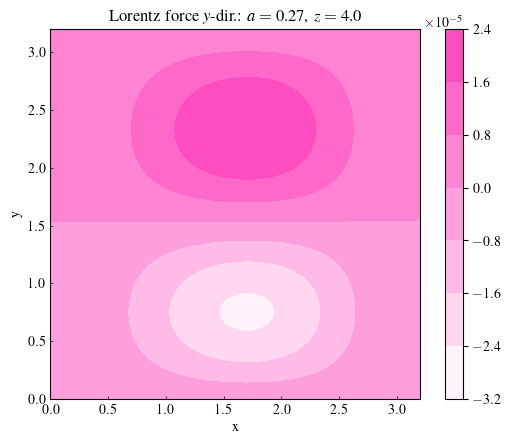

In [29]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dL.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $y$-dir.: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfy_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dMHS.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 0],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $y$-dir.: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfy_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

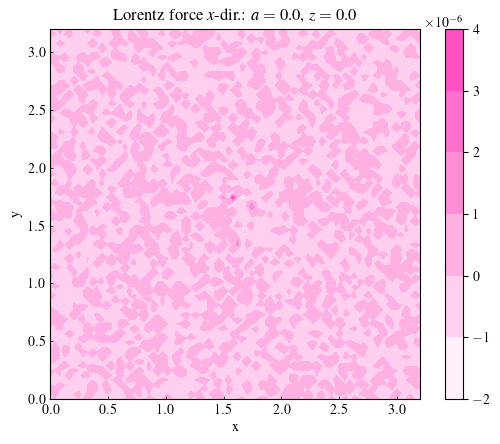

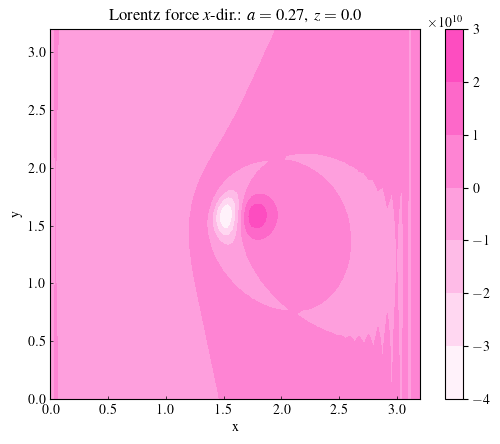

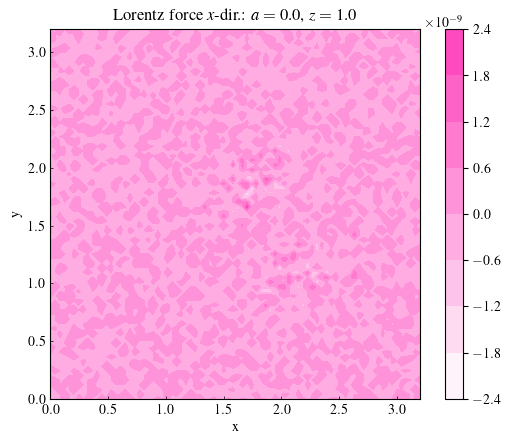

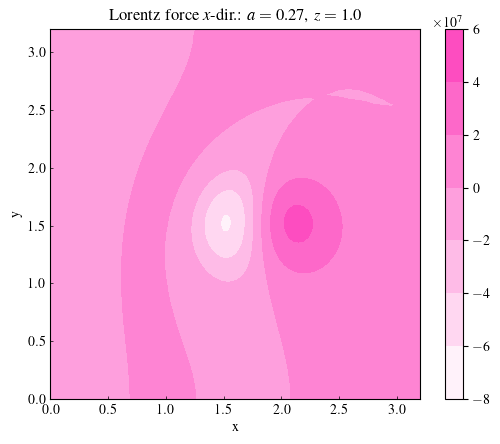

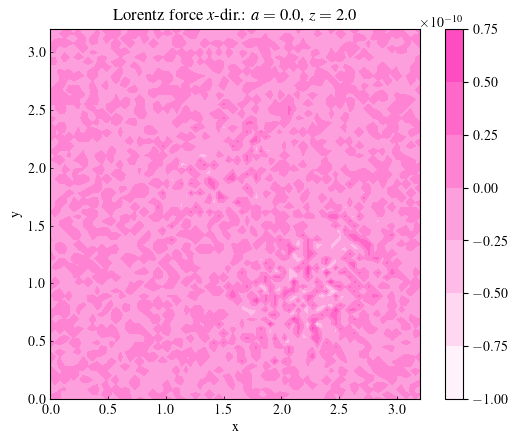

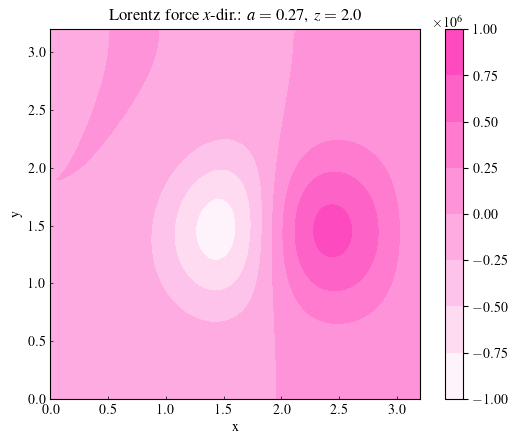

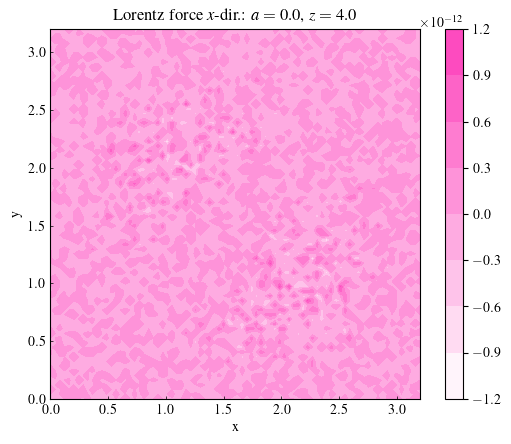

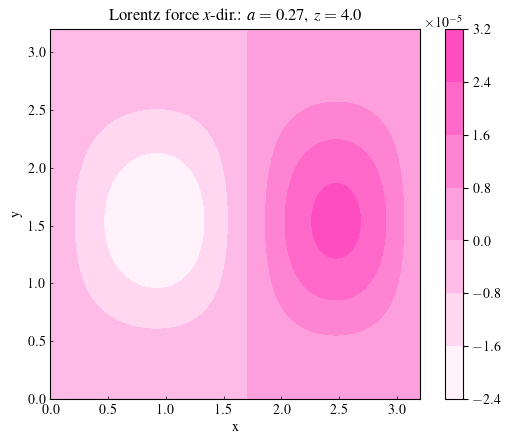

In [30]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dL.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $x$-dir.: $a =$ "
        + str(aL)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfx_" + str(aL) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_grid,
        y_grid,
        data3dMHS.lf3D[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iiz, 1],
        6,
        cmap=ErrormapL,
        # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
        # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"Lorentz force $x$-dir.: $a =$ "
        + str(aMHS)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = folder + "/lfx_" + str(aMHS) + "_" + str(zii) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()